# **Exploratory Data Analysis (EDA)** 


In [10]:
import pandas as pd
import numpy as np # linear algebra
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization
import matplotlib.ticker as mticker
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import plotly.express as px
import os
%matplotlib inline

In [11]:
combined_df =pd.read_csv("preprocessed_df.csv")

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497773 entries, 0 to 497772
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   name                 497773 non-null  object 
 1   main_category        497773 non-null  object 
 2   sub_category         497773 non-null  object 
 3   ratings              497773 non-null  float64
 4   brand                497773 non-null  object 
 5   actual_price_eur     497773 non-null  float64
 6   discount_price_eur   497773 non-null  float64
 7   discount_percentage  497773 non-null  float64
 8   outlier_no_ratings   497773 non-null  bool   
 9   no_of_ratings        497773 non-null  float64
 10  outlier_price        497773 non-null  bool   
dtypes: bool(2), float64(5), object(4)
memory usage: 35.1+ MB



## **Most popular categories and brands**


### **Most popular Main Category**
One crucial aspect of this data analysis is identifying the main category that dominates the platform in terms of product offerings. 
This insight helps in understanding the areas of focus and the market segments that the platform caters to the most. By visualizing 
the distribution of products across different main categories using a bar plot, we can easily grasp which category stands out with 
the highest number of products. This information can guide decision-making for marketing strategies, resource allocation, and 
potential areas for expansion. The code provided utilizes the seaborn library to create a clear bar plot that visually 
represents the product distribution among main categories, allowing for easy identification of the category with the highest 
product count.

#### **a) Bar Chart Most Popular Main Category**

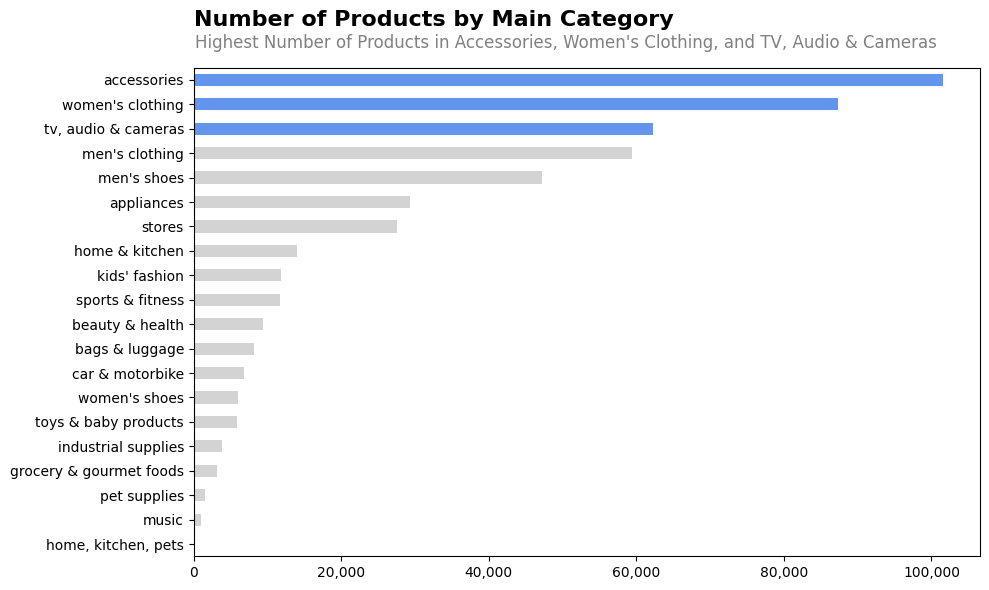

In [12]:
# Group by main_category and count the number of products in each category
category_counts = combined_df['main_category'].value_counts().sort_values(ascending=True)

# Get the top 3 categories
top_3_categories = category_counts.tail(3).index

# Define colors for the top 3 categories and light gray for the rest
colors = ['lightgray' if category not in top_3_categories else '#6495ED' for category in category_counts.index]

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
category_counts.plot(kind='barh', color=colors)

# Format x-axis labels as thousands
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Remove y-axis labels and grid lines
plt.ylabel('')
plt.grid(False)

# Set labels and title
plt.xlabel('')
plt.title('Number of Products by Main Category', loc='left', pad=30, fontweight='bold', fontsize=16)

# Add a subtitle
plt.text(0.474, 1.04, "Highest Number of Products in Accessories, Women's Clothing, and TV, Audio & Cameras", fontsize=12, color='gray', ha='center', transform=plt.gca().transAxes)

plt.tight_layout()

plt.show()


####  **b) Insights: Number of products by main category**

The bar chart depicting the number of products by main category provides several insights into market dynamics, consumer behavior, and potential business strategies:

- **Consumer Focus:** The substantial number of products in the "Accessories" and "Women's Clothing" categories points to these areas as high-interest fields for consumers. These categories could be driving a large portion of e-commerce traffic and sales.

- **Market Saturation:** With "Accessories" having the highest number of products, this could indicate a saturated market with intense competition among sellers. Companies may need to differentiate their products or compete on price, quality, and customer service to stand out.

- **Technology and Electronics:** The significant representation of "TV, Audio & Cameras" suggests that electronics remain a crucial segment of online retail. It's a category likely influenced by rapid technological advancements and could be subject to seasonal and trend-based fluctuations.

- **Target Audience Segmentation:** The clear distinction between "Men's Clothing" and "Women's Clothing" indicates that these markets are sufficiently large to warrant separate targeting and marketing strategies. Brands often tailor their product development and promotional efforts to align with the specific preferences of each demographic.

- **Lifestyle and Home Categories:** The presence of "Appliances," "Home & Kitchen," and "Furniture" reflects a steady demand for home improvement and lifestyle products. This might be influenced by trends in home ownership or interest in home aesthetics and functionality.

- **Niche vs. Mass Markets:** The lower number of products in categories such as "Pet Supplies" or "Music" may point to more niche markets. While these areas might have a smaller customer base, they could also represent markets with less competition and a dedicated customer base.

- **Emerging Opportunities:** Categories like "Beauty & Health," "Sports & Fitness," and "Toys & Baby Products," though not among the most populated, could be areas where consumer interest is growing. Emerging trends and increasing health consciousness could drive growth in these segments.

- **Product Lifecycle Impact:** The variance in the number of products across categories could also be reflective of the product lifecycle stages. Some categories may be in the maturity or decline phase, while others could be experiencing growth or renewal.

Overall, this chart offers strategic insights for businesses to understand where there may be opportunities or challenges due to the number of offerings in each category. For new entrants, categories with fewer products might offer easier entry points, while established players could find value in capitalizing on their strengths in more competitive categories.

### **Diversity of Categories**


In the following, we group products by their main categories, count the unique subcategories within each main category, and create a horizontal bar plot to show the diversity of subcategories. The main categories are sorted by the number of unique subcategories, and each category is represented by a different shade of blue in the plot. 

This plot helps us understand how varied the subcategories are within each main category, providing insights into the product catalog's structure and diversity. The use of different shades of blue enhances the visual appeal and distinction of each main category in the plot. The subtitle adds context to the visualization, emphasizing its purpose as a tool for exploring the distribution of subcategories within main categories.

#### **a) Barplot Unique Subcategories**

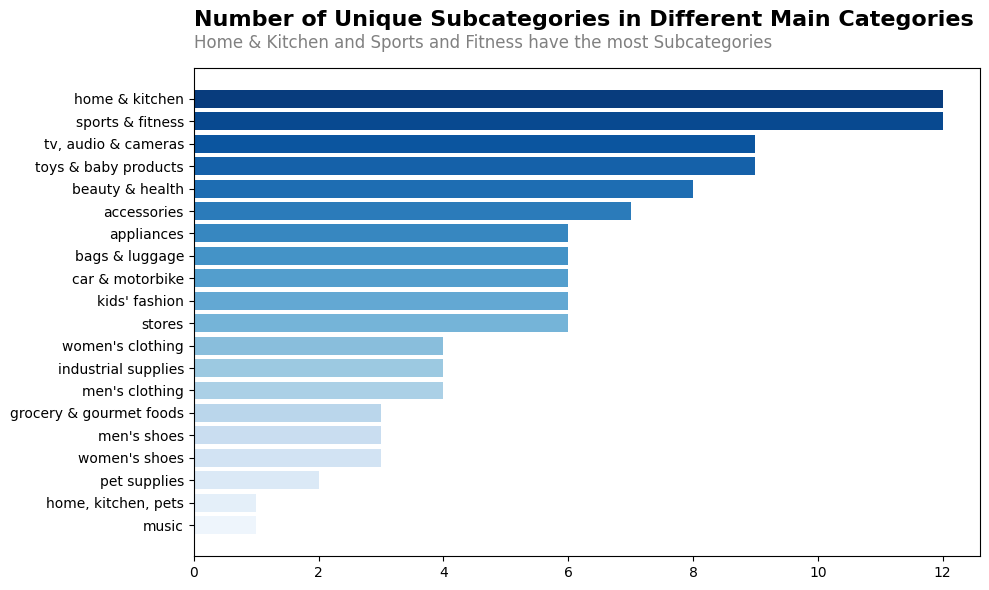

In [13]:
# Group by main categories and count the number of unique subcategories
unique_subcategory_counts = combined_df.groupby("main_category")["sub_category"].nunique()

# Sort main categories by the number of unique subcategories
sorted_categories = unique_subcategory_counts.sort_values(ascending=True).index

# Create a color palette with various shades of blue
colors = sns.color_palette("Blues", len(sorted_categories))

# Create a horizontal bar chart for the number of unique subcategories in different main categories
plt.figure(figsize=(10, 6))
ax = plt.barh(sorted_categories, unique_subcategory_counts[sorted_categories], color=colors)

# Set x-axis label and title
plt.xlabel("")
plt.title("Number of Unique Subcategories in Different Main Categories", loc='left', pad=30, fontweight='bold', fontsize=16)

# Set y-axis label and rotation
plt.ylabel("", labelpad=20)

# Remove grid lines
plt.grid(False)

plt.tight_layout()

# Add a subtitle
plt.text(0.368, 1.04, "Home & Kitchen and Sports and Fitness have the most Subcategories", fontsize=12, color='gray', ha='center', transform=plt.gca().transAxes)

plt.show()


####  **b) Insights: Number of Unique Subcategories**

Which insights could we gain from the analysis? 

- **Market Segmentation**: The presence of a diverse range of subcategories within certain main categories like "Sports & Fitness" and "Home & Kitchen" suggests a highly segmented market. Retailers can tailor their product offerings to cater to specific niches within these categories.

- **Product Variety**: Categories with a high number of unique subcategories, such as "Beauty & Health" and "TV, Audio & Cameras," offer a wide variety of products. Consumers have a broader selection to choose from, potentially leading to increased competition among brands.

- **Specialization**: Main categories with fewer subcategories, such as "Music" and "Home, Kitchen, Pets," may indicate a more specialized focus. Retailers in these categories may have a more concentrated product range, targeting specific customer needs.

- **Consumer Preferences**: Understanding the diversity of subcategories within a main category can help retailers and marketers identify consumer preferences and trends. For example, a high number of subcategories in "Kids' Fashion" may suggest a vibrant and evolving children's clothing market.

- **Market Opportunities**: Categories with a lower number of unique subcategories may present opportunities for expansion. Retailers can explore diversifying their product offerings to meet unmet consumer needs and potentially capture a larger market share.

- **Competition**: In categories with a large number of subcategories, businesses may face higher competition, as many brands vie for consumer attention. Effective marketing and product differentiation become crucial in such competitive landscapes.

- **Product Development**: Retailers can use this information to guide their product development strategies. Knowing the diversity of subcategories allows them to focus on areas with higher demand or potential for innovation.

- **Consumer Experience**: A diverse range of subcategories enhances the overall shopping experience for consumers. They can find products that align more closely with their specific preferences and needs.

In conclusion, the analysis of unique subcategories within main product categories provides valuable insights into the structure of the market, consumer preferences, and opportunities for businesses to tailor their strategies for success.

### **Most popular Subcategory**
#### **a) Bar Chart Number of Subcategories**

To gain a better understanding of our product distribution, we will also create a bar chart that showcases the count of items within each subcategory. This visualization will help identify which specific subcategories have the highest number of products, thereby indicating potential areas of market concentration and consumer interest.

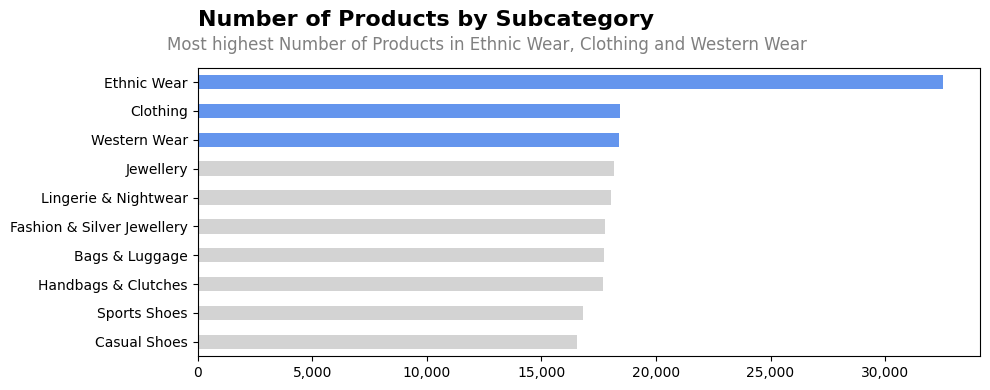

In [14]:
# Group by sub_category and count the number of products in each category
subcategory_counts = combined_df['sub_category'].value_counts().sort_values(ascending=True)

# Get the top 20 subcategories
top_10_subcategories = subcategory_counts.tail(10).index

# Define colors for the top 20 subcategories
colors = ['lightgray' if subcategory in top_10_subcategories[:-3] else '#6495ED' for subcategory in top_10_subcategories]

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
subcategory_counts[top_10_subcategories].plot(kind='barh', color=colors)

# Format x-axis labels as thousands
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Remove y-axis labels and grid lines
plt.ylabel('')
plt.grid(False)

# Set labels and title
plt.xlabel('')
plt.title('Number of Products by Subcategory', loc='left', pad=30, fontweight='bold', fontsize=16)

# Add a subtitle
plt.text(0.37, 1.06, "Most highest Number of Products in Ethnic Wear, Clothing and Western Wear", fontsize=12, color='gray', ha='center', transform=plt.gca().transAxes)

plt.tight_layout()

plt.show()


#### **b) Insights: Number of Products by Subcategory**

Based on the horizontal bar chart which illustrates the number of products by subcategory within a larger category that includes Ethnic Wear, Clothing, and Western Wear, here are some insights that can be drawn:

- **Ethnic Wear Dominance:** Ethnic Wear tops the chart, suggesting a high consumer interest or market demand in this subcategory. Retailers might capitalize on this by offering a wide range of ethnic wear products.

- **General Clothing Interest:** The subcategory labeled "Clothing" likely represents a general assortment of clothing items and holds strong interest, as indicated by the high number of products.

- **Western Wear Popularity:** Western Wear also shows significant numbers, indicating its popularity and the cultural diversity of clothing preferences among consumers.

- **Jewelry and Accessories:** The presence of "Jewellery" along with "Fashion & Silver Jewellery" and "Handbags & Clutches" suggests that accessories are an important part of the consumer's shopping list, potentially driven by fashion trends and personal accessorizing.

- **Intimate Apparel Market:** The "Lingerie & Nightwear" category has a substantial number of products, which could indicate a robust market for intimate apparel, driven by consumer demand for variety and personalization.

- **Sport and Casual Footwear:** There is a notable interest in "Sports Shoes" and "Casual Shoes," which might reflect an active lifestyle trend and the importance of casual comfort in footwear choices.

- **Bag Varieties:** "Bags & Luggage" suggests the practical needs of consumers for various occasions, such as travel, work, and school, while "Handbags & Clutches" point towards a more fashion-forward or event-specific demand.



### **Most popular Brands**
#### **a) Bar Chart Most Popular Brands**

In the next step we create a plot to compare the distribution of the number of products offered by different brands within the dataframe. Specifically, the plot aims to highlight the top 10 brands with the highest number of products and provide insight into their relative prominence and facilitates the identification of key players in the dataset and supports decision-making based on the brands' product offerings.

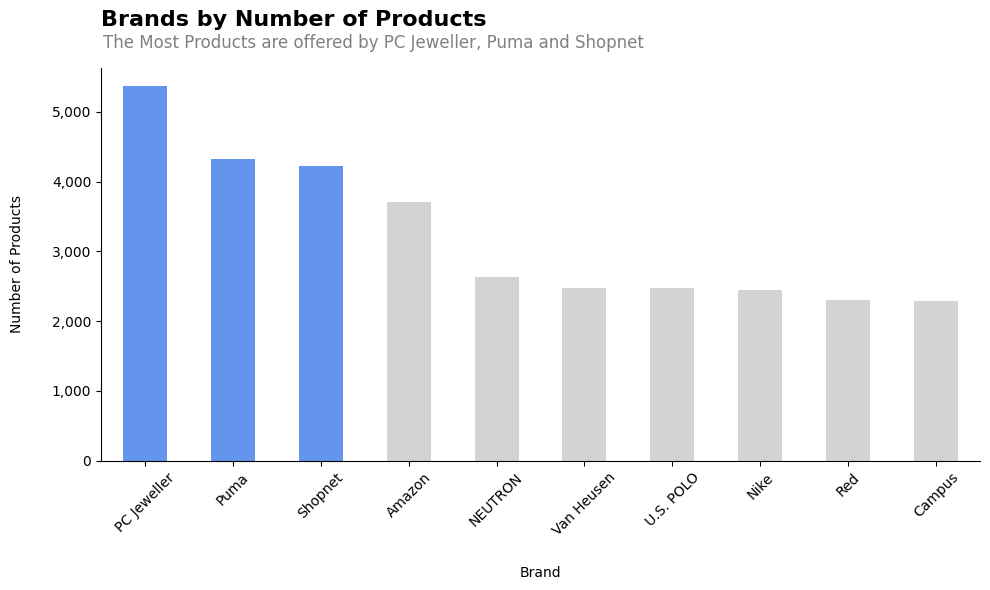

In [15]:
# Gruppiere nach Marke und zähle die Anzahl der Produkte pro Marke
brand_counts = combined_df["brand"].value_counts()

# Choose the top 10 brands
top_10_brands = brand_counts.head(10)

# Define colors for the top 2 and the rest of the brands
colors = ["#6495ED" if brand in top_10_brands.index[:3] else "lightgray" for brand in top_10_brands.index]

# Create a bar plot for the top 10 brands with custom colors
plt.figure(figsize=(10, 6))
ax = top_10_brands.plot(kind="bar", color=colors)
ax.spines['top'].set_visible(False)  # Remove top border line
ax.spines['right'].set_visible(False)  # Remove right border line

# Remove grids
ax.yaxis.grid(False)
ax.xaxis.grid(False)

# Add thousand separators to the y-axis ticks
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.title("Brands by Number of Products", loc='left', pad=30, fontweight='bold', fontsize=16)
plt.xlabel("Brand", labelpad=20)
plt.ylabel("Number of Products", labelpad=20)
plt.xticks(rotation=45)
plt.tight_layout()

# Add a subtitle
plt.text(0.31, 1.05, "The Most Products are offered by PC Jeweller, Puma and Shopnet", fontsize=12, color='gray', ha='center', transform=plt.gca().transAxes)

plt.show()

#### **b) Insights: Brands by number of products**

The vertical bar chart above presents a comparison of various brands by the number of products they offer. As we see, PC Jeweller, Puma, and Shopnet have the most products offered compared to the other brands displayed on the chart.

Here's a deeper look at the potential insights:

- **Product Range:** PC Jeweller, Puma, and Shopnet have extensive product ranges. This could imply a broad market presence and a strategy of catering to diverse consumer needs and preferences.

- **Market Positioning:** The substantial number of products offered by PC Jeweller suggests a strong position in the jewelry market, while Puma's product count indicates a similar stance in the athletic apparel and footwear market. Shopnet appears to be a major player in their respective category as well.

- **Brand Diversification:** The fact that these brands offer a large number of products may reflect a diversified product portfolio. This can appeal to a wide customer base and mitigate risks associated with market demand fluctuations.

- **Catalog Depth:** Brands with a deeper catalog, such as PC Jeweller and Puma, may have more opportunities to engage with customers through a variety of product types and price points.

### **Average Rating of Top Brands**
#### **a) Barplot Average Rating of Top Brands**

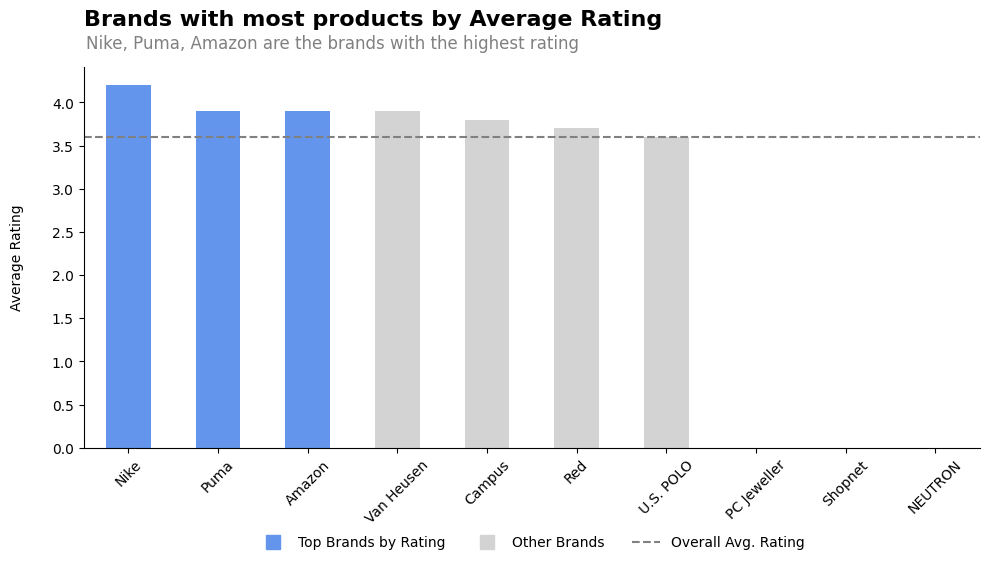

,Brand,Median Rating,Number of Products
0,Nike,4.2,5364
1,Puma,3.9,4324
2,Amazon,3.9,4227
3,Van Heusen,3.9,3710
4,Campus,3.8,2638
5,Red,3.7,2480
6,U.S. POLO,3.6,2474
7,PC Jeweller,0.0,2448
8,Shopnet,0.0,2298
9,NEUTRON,0.0,2283


In [16]:
# Calculate the average ratings for each brand
brand_avg_ratings = combined_df.groupby("brand")["ratings"].median()

# Calculate the overall average rating
overall_avg_rating = combined_df["ratings"].median()

# Group by brand and count the number of products per brand
brand_counts = combined_df["brand"].value_counts()

# Choose the top 10 brands
top_10_brands = brand_counts.head(10)

# Choose the top 10 brands with the highest average ratings and sort them
top_10_avg_ratings = brand_avg_ratings[top_10_brands.index].sort_values(ascending=False)

# Create a list of colors for the bars, with the first 3 brands in blue
colors = ["#6495ED" if brand in top_10_avg_ratings.index[:3] else "lightgray" for brand in top_10_avg_ratings.index]

# Create a bar plot for the top 10 brands with custom colors
plt.figure(figsize=(10, 6))
ax = top_10_avg_ratings.plot(kind="bar", color=colors)
ax.spines['top'].set_visible(False)  # Remove the top border line
ax.spines['right'].set_visible(False)  # Remove the right border line

# Add a line for the overall average rating
plt.axhline(y=overall_avg_rating, color='gray', linestyle='dashed', label='Overall Avg. Rating')

# Remove grids
ax.yaxis.grid(False)
ax.xaxis.grid(False)

plt.title("Brands with most products by Average Rating", loc='left', pad=30, fontweight='bold', fontsize=16)
plt.xlabel("", labelpad=20)
plt.ylabel("Average Rating", labelpad=20)
plt.xticks(rotation=45)

# Customize the legend
legend_title = ""
legend_icon_top_brands = plt.Line2D([0], [0], marker='s', markersize=10, label='Top Brands by Rating', color='#6495ED', linestyle='None')
legend_icon_gray = plt.Line2D([0], [0], marker='s', markersize=10, label='Other Brands', color='lightgray', linestyle='None')
legend_line = plt.Line2D([], [], linestyle='dashed', color='gray', label='Overall Avg. Rating')
plt.legend(handles=[legend_icon_top_brands, legend_icon_gray, legend_line], title=legend_title, loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3, facecolor='lightgray', framealpha=0.0)

plt.tight_layout()

# Create a subtitle based on brand names
top_brands_names = ', '.join(top_10_avg_ratings.index[:3])  # Get the names of the first 3 brands
subtitle = f"{top_brands_names} are the brands with the highest rating"
plt.text(0.278, 1.05, subtitle, fontsize=12, color='gray', ha='center', transform=plt.gca().transAxes)

plt.show()

# Creating a DataFrame for the top 10 brands including their average ratings and product counts
top_10_brands_summary = pd.DataFrame({
    'Brand': top_10_avg_ratings.index,
    'Median Rating': top_10_avg_ratings.values,
    'Number of Products': top_10_brands.values
}).reset_index(drop=True)

# Display the DataFrame
top_10_brands_summary


To check whether the median rating for PC Jeweller, Shopnet und NEUTRON are due to missing values or a scraping failure I spotchecked products for them. As a result, I got:

<img src="shopnet_amazon.png" width="900" height="500">


#### **b) Insights: Average rating of most popular products**

The bar chart you've uploaded seems to represent the average ratings of various brands, highlighting "Nike," "Puma," and "Amazon" as the brands with the highest average ratings among the products they offer.

From what you've described, here’s an interpretation of the chart:

- **Top Brands by Rating (Blue Bars):** Nike, Puma, and Amazon have the highest average ratings, all appearing above the overall average rating line. This suggests that products from these brands are generally well-received by customers.

- **Other Brands (Grey Bars):** Van Heusen, Campus, Red, U.S. POLO, P.C. Jeweller, Shopnet, and NEUTRON are shown in grey bars, indicating their average ratings. All these brands have average ratings below the top three but still seem to be around or just below the overall average.

- **Overall Average Rating (Dashed Line):** The dashed line represents the overall average rating across all brands. This benchmark allows us to see which brands are performing above or below average in terms of customer satisfaction.

- **Comparison:** The graph visually compares the average ratings of different brands, showing a clear distinction between the top performers and other brands. This may help consumers make more informed choices, and can inform the brands themselves about their relative positioning in the market.

- **Marketing Insights:** For the brands that fall below the overall average rating, there might be a need for investigation into product quality, customer service, or other aspects that could be improved to raise customer satisfaction 

**Absence of visible bars for PC Jeweller, Shopnet and NEUTRON**

The absence of visible bars for PC Jeweller, Shopnet, and NEUTRON in the chart, along with your spot check on Amazon's page, suggests that these products indeed have few to no reviews. Here are some potential explanations and implications:

- **New Products:** If the products are relatively new, they may not have accumulated enough purchases to garner reviews.

- **Niche Products:** Some products appeal to a very specific customer segment and thus might naturally receive fewer reviews.

- **Lack of Visibility:** If these products are not prominently visible or easy to find, perhaps due to less effective marketing strategies, they could be generating fewer purchases and consequently fewer reviews.

- **Reluctance to Review:** Customers may be hesitant to leave reviews for various reasons, such as neutrality toward the product or no strong incentive to write a review.

For the brands in question, this might indicate a need to encourage their customers to leave feedback. Customer reviews are a significant factor in the online purchasing decision process, and a lack of reviews can deter potential buyers from choosing a product. Strategies to address this could include offering incentives for leaving a review or introducing follow-up emails post-purchase that prompt for a review.

## **Correlation Analysis**


#### **Correlation Matrix**

In the next step we create a heatmap to visualize the correlations between selected columns ('ratings', 'no_of_ratings', 'discount_price_eur', 'actual_price_eur') in the dataframe. The heatmap uses colors to represent the strength and direction of these correlations. The advantage of using a heatmap for this purpose is that it provides a clear, visual representation of the relationships between multiple variables in a compact and easily interpretable format. It allows us to identify both positive and negative correlations, as well as their magnitudes, at a glance, making it a valuable tool for exploratory data analysis and identifying patterns in the data.

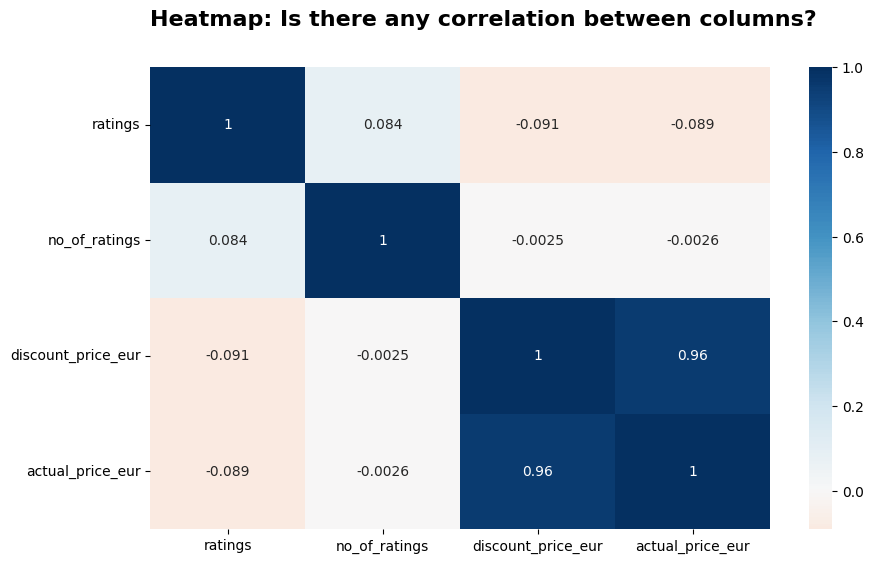

In [17]:
# Select relevant columns for analysis
selected_columns = ['ratings', 'no_of_ratings', 'discount_price_eur', 'actual_price_eur']

# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Create the heatmap on the subplot
correlation_matrix_combined = combined_df[selected_columns].corr()
sns.heatmap(data=correlation_matrix_combined, annot=True, cmap='RdBu', center=0, ax=ax)
ax.set_title('Heatmap: Is there any correlation between columns?', pad=30, loc="left", fontweight="bold", fontsize=16)

# Show the plot
plt.show()


#### **b) Insights: Correlation Matrix**

The heatmap shows the correlation coefficients between different variables: ratings, number of ratings, discount price in EUR, and actual price in EUR. A heatmap is a graphical representation of data where individual values contained in a matrix are represented as colors.

Here's a summary of the correlations shown in the heatmap:

- **ratings and no_of_ratings:** The correlation coefficient of 0.084 suggests a very weak positive correlation between the average ratings and the number of ratings a product has received.

- **ratings and discount_price_eur:** With a correlation coefficient of -0.091, there is a very weak negative correlation between the average ratings and the discount price in EUR.

- **ratings and actual_price_eur:** Similarly, the correlation coefficient of -0.089 indicates a very weak negative correlation between the average ratings and the actual price in EUR.

- **no_of_ratings and discount_price_eur:** There is virtually no correlation (-0.0025) between the number of ratings and the discount price, indicating that the two variables are unrelated.

- **no_of_ratings and actual_price_eur:** There is also essentially no correlation (-0.0026) between the number of ratings and the actual price, suggesting no relationship between them.

- **discount_price_eur and actual_price_eur:** The correlation coefficient of 0.96 indicates a very strong positive correlation between the discount price and the actual price. This is expected as typically the discount price is derived from the actual price (for example, a percentage reduction of the actual price).

From this heatmap, it's clear that the strongest relationship is between the actual price and the discount price, which makes sense as they are directly related to each other. However, the relationship between prices and ratings or the number of ratings is very weak, suggesting that the price does not significantly influence how customers rate the products or how many customers rate the products.

### **Correlation between Ratings and Number of Ratings**

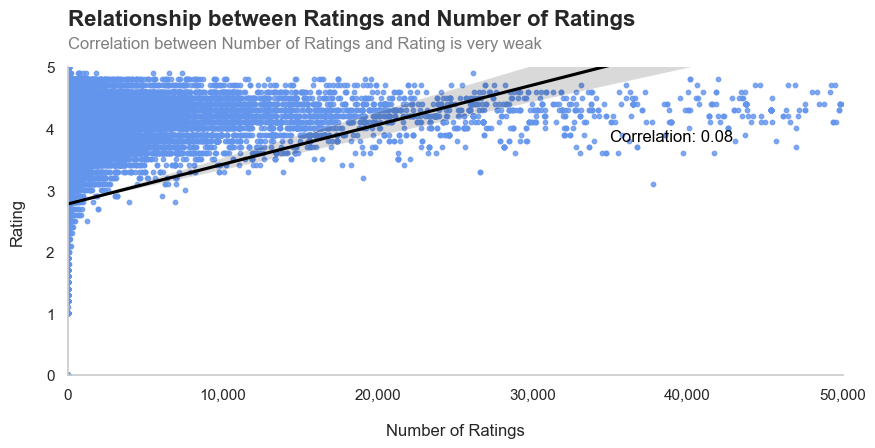

In [18]:
# Calculate the correlation
correlation = combined_df["no_of_ratings"].corr(combined_df["ratings"])

# Scatter plot with regression line
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")  # Remove grid lines
ax = sns.regplot(x="no_of_ratings", y="ratings", data=combined_df, scatter_kws={'s': 10, 'color': '#6495ED'}, color='black')
ax.spines['top'].set_visible(False)  # Remove top border line
ax.spines['right'].set_visible(False)  # Remove right border line

# Adjust x-axis labels and tick spacing
ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_locator(mticker.MultipleLocator(base=10000))

# Limit y-axis to range from 0 to 5
ax.set_ylim(0, 5)
ax.set_xlim(0, 50000)

# Remove grid lines
ax.yaxis.grid(False)
ax.xaxis.grid(False)

plt.title("Relationship between Ratings and Number of Ratings", loc='left', fontsize=16, pad=30, fontweight='bold')
plt.text(0, 5.3, "Correlation between Number of Ratings and Rating is very weak", fontsize=12, color='gray')
plt.xlabel("Number of Ratings", labelpad=15)
plt.ylabel("Rating", labelpad=15)
plt.text(35000, 3.8, f"Correlation: {correlation:.2f}", fontsize=12, color="black")
plt.show()


The scatter plot illustrates the relationship between the number of ratings a product receives (x-axis) and the average rating of the product (y-axis). The noted correlation coefficient is 0.08, which suggests a very weak positive correlation between the two variables. This means as the number of ratings increases, there is a slightly positive effect on the average rating, but the relationship is not strong.

The scatter plot indicates that:

- Products with a very high number of ratings do not necessarily have high or low ratings; they are spread across the rating spectrum.
- There's a large cluster of data points with a low number of ratings, which is typical since many products tend to receive only a few ratings.
- The data points seem to be more spread out as the number of ratings increases, suggesting that products with many ratings can have a wide range of average ratings.
- The black trend line provides a visual representation of the overall relationship, which in this case is very shallow, indicating the weak correlation.

Such a weak correlation suggests that having more ratings doesn't strongly predict whether those ratings will be higher or lower on average. The quality of the product, as perceived by customers, is likely the dominant factor affecting the average rating rather than the number of ratings itself.

### **Correlation between Discount Price and Rating**

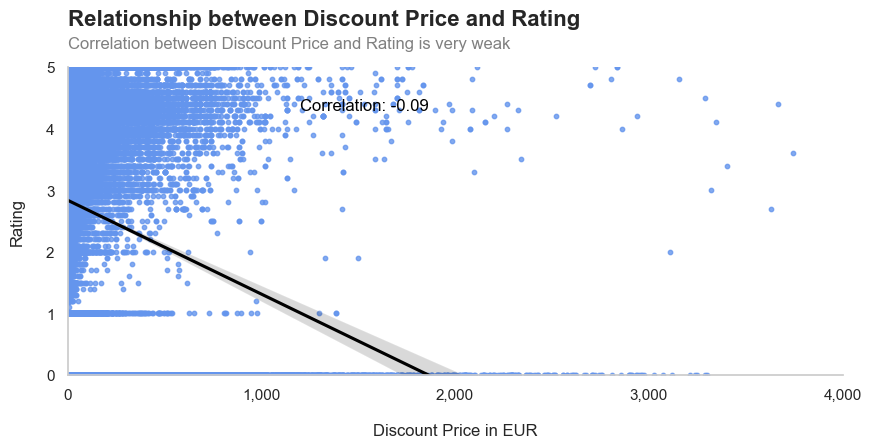

In [19]:
# Calculate the correlation
correlation = combined_df["discount_price_eur"].corr(combined_df["ratings"])

# Scatter plot with regression line
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")  # Remove grids
ax = sns.regplot(x="discount_price_eur", y="ratings", data=combined_df, scatter_kws={'s': 10, 'color': '#6495ED'}, color='black')
ax.spines['top'].set_visible(False)  # Remove top border line
ax.spines['right'].set_visible(False)  # Remove right border line

# Adjust x-axis labels and tick spacing
ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_locator(mticker.MultipleLocator(base=1000))

# Limit y-axis to range from 0 to 5
ax.set_ylim(0, 5)
ax.set_xlim(0, 4000)

# Remove grids
ax.yaxis.grid(False)
ax.xaxis.grid(False)

# Set title and subtitle
plt.title("Relationship between Discount Price and Rating", loc='left', fontsize=16, pad=30, fontweight='bold')
plt.text(0, 5.3, "Correlation between Discount Price and Rating is very weak", fontsize=12, color='gray')
plt.xlabel("Discount Price in EUR", labelpad=15)
plt.ylabel("Rating", labelpad=15)
plt.text(1200, 4.3, f"Correlation: {correlation:.2f}", fontsize=12, color="black")

# Show the plot
plt.show()


In the scatter plot, the relationship between the discount price in EUR and the product rating is examined. The correlation coefficient is reported as -0.09, suggesting a very weak negative correlation between the discount price and the rating. This means that, as the discount price increases, there's a slight tendency for the product rating to decrease, but the effect is so weak that it's not a reliable predictive relationship.

Key observations from the plot:

- Most of the data points are clustered at the lower end of the discount price scale, indicating that a majority of the products have lower discount prices.
- The ratings are densely packed around the 3 to 4 range, across all discount price points.
- There are some outliers with high discount prices and various ratings, but they are not numerous enough to strongly influence the overall trend.
- The negative slope of the trend line is very slight, aligning with the weak correlation coefficient.

The weak correlation suggests that the price discount alone is not a strong driver of how a product is rated by customers. Other factors, such as the perceived quality and value of the product, customer expectations, and experience, are likely more influential on the ratings.

### **Correlation between Rating and Discount Percentage**

This code calculates and visualizes the correlation between the discount percentage and product ratings using a scatter plot with a regression line. It adjusts the plot's appearance and labels for clarity.

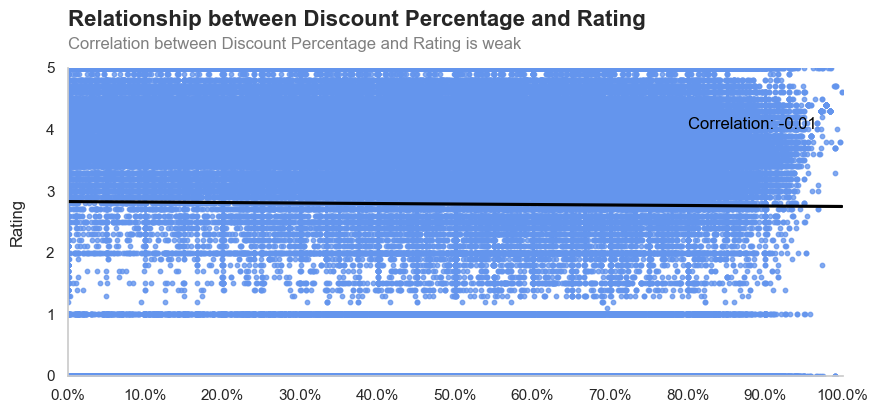

<Figure size 640x480 with 0 Axes>

In [21]:
# Calculate the correlation
correlation = combined_df["discount_percentage"].corr(combined_df["ratings"])

# Scatter plot with regression line
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")  # Remove grids
ax = sns.regplot(x="discount_percentage", y="ratings", data=combined_df, scatter_kws={'s': 10, 'color': '#6495ED'}, color='black')
ax.spines['top'].set_visible(False)  # Remove top border line
ax.spines['right'].set_visible(False)  # Remove right border line

# Adjust x-axis labels and tick spacing
ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,}%'))
ax.xaxis.set_major_locator(mticker.MultipleLocator(base=10))

# Limit y-axis to range from 0 to 5
ax.set_ylim(0, 5)
ax.set_xlim(0, 100)

# Remove grids
ax.yaxis.grid(False)
ax.xaxis.grid(False)

# Set title and subtitle
plt.title("Relationship between Discount Percentage and Rating", loc='left', fontsize=16, pad=30, fontweight='bold')
plt.text(0, 5.3, "Correlation between Discount Percentage and Rating is weak", fontsize=12, color='gray')
plt.xlabel("", labelpad=15)
plt.ylabel("Rating", labelpad=15)
plt.text(80, 4, f"Correlation: {correlation:.2f}", fontsize=12, color="black")

# Show the plot
plt.show()


The image presents a scatter plot that examines the relationship between discount percentage and customer ratings of products. According to the plot and the note on it, the correlation coefficient is -0.01, which suggests that there is a very weak, nearly non-existent, negative relationship between how much a product is discounted and its rating.

Here's an interpretation:

- **Data Spread:** The plot shows a wide dispersion of ratings across all levels of discount percentages. There's a visible concentration of ratings around the 3 to 4 mark, which is consistent across discounts from 0% to around 100%.

- **Correlation Coefficient:** The value of -0.01 is close to zero, indicating that there's no substantial linear relationship between the discount percentage and the ratings. This means that, in general, whether a product is heavily discounted or not has almost no bearing on how it is rated by customers.

- **Potential Outliers:** There are some data points at higher discount percentages with various ratings, but these do not significantly affect the overall correlation.

- **Ratings Distribution:** Most of the products, regardless of the discount applied, seem to have ratings clustered between 3 and 4. This suggests that the perceived quality of the products, as indicated by ratings, is not significantly influenced by the discount level.

These findings could imply that customers are rating products based on factors other than price or discount value, such as quality, satisfaction with the product, or other attributes that do not change with price variation. For retailers and manufacturers, this could suggest that while discounts might help in increasing sales volumes, they do not necessarily impact customer satisfaction or perceived product quality.

### **Correlation between Rating and Actual Price**

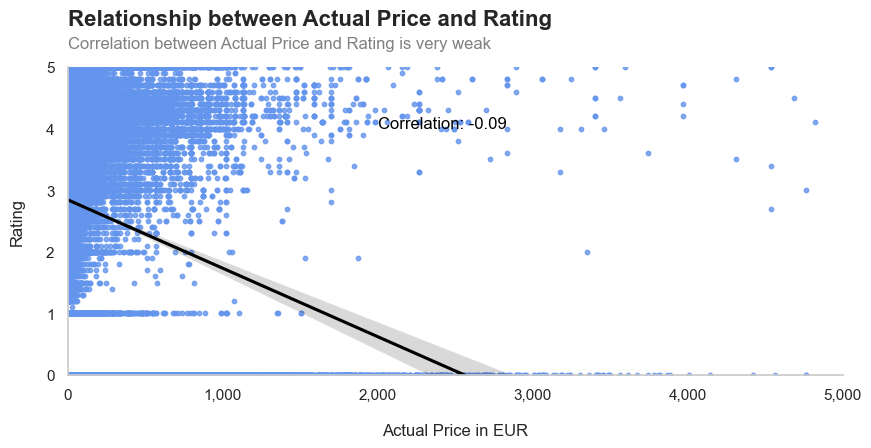

In [60]:
# Calculate the correlation
correlation = combined_df["actual_price_eur"].corr(combined_df["ratings"])

# Scatter plot with regression line
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")  # Remove grids
ax = sns.regplot(x="actual_price_eur", y="ratings", data=combined_df, scatter_kws={'s': 10, 'color': '#6495ED'}, color='black')
ax.spines['top'].set_visible(False)  # Remove top border line
ax.spines['right'].set_visible(False)  # Remove right border line

# Adjust x-axis labels and tick spacing
ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_locator(mticker.MultipleLocator(base=1000))

# Limit y-axis to range from 0 to 5
ax.set_ylim(0, 5)
ax.set_xlim(0, 5000)

# Remove grids
ax.yaxis.grid(False)
ax.xaxis.grid(False)

# Set title and subtitle
plt.title("Relationship between Actual Price and Rating", loc='left', fontsize=16, pad=30, fontweight='bold')
plt.text(0, 5.3, "Correlation between Actual Price and Rating is very weak", fontsize=12, color='gray')
plt.xlabel("Actual Price in EUR", labelpad=15)
plt.ylabel("Rating", labelpad=15)
plt.text(2000, 4, f"Correlation: {correlation:.2f}", fontsize=12, color="black")

# Show the plot
plt.show()


The scatter plot shows the relationship between the actual price in EUR and the rating of products. The plot includes a trend line and indicates a correlation coefficient of -0.09.

Here’s how to interpret the information provided:

**Correlation Coefficient (-0.09):** 
- This value suggests a very weak negative correlation between price and rating. In practical terms, this implies that there is no strong relationship where higher prices correlate with higher ratings or vice versa.

**Scatter Plot Distribution:**

- The data points are widely dispersed, reinforcing the idea of a weak correlation.
- There's a considerable amount of clustering of data points at the lower price range with ratings mostly between 3 and 5.
- As the price increases, the distribution of ratings spreads out, and fewer products have very high or very low ratings.

**Trend Line**

- The trend line is nearly horizontal but slightly negative, suggesting that as the price increases, the rating does not necessarily increase and might slightly decrease. However, given the weak correlation, this trend is not considered strong or significant.

**Analysis Summary:**

- The data indicates that price is not a good predictor of product ratings. This could imply that customers do not necessarily perceive higher-priced items as higher quality or more satisfactory.
- A majority of products, especially those in the lower price range, tend to receive ratings in the middle to high range (3 to 5).
- The lack of a clear trend in the data suggests that other factors, besides price, have a more significant impact on how customers rate products.

## **Price Distribution**

### **Price Distribution by Main Categories**

#### **a) Boxenplot Distribution Main Categories**

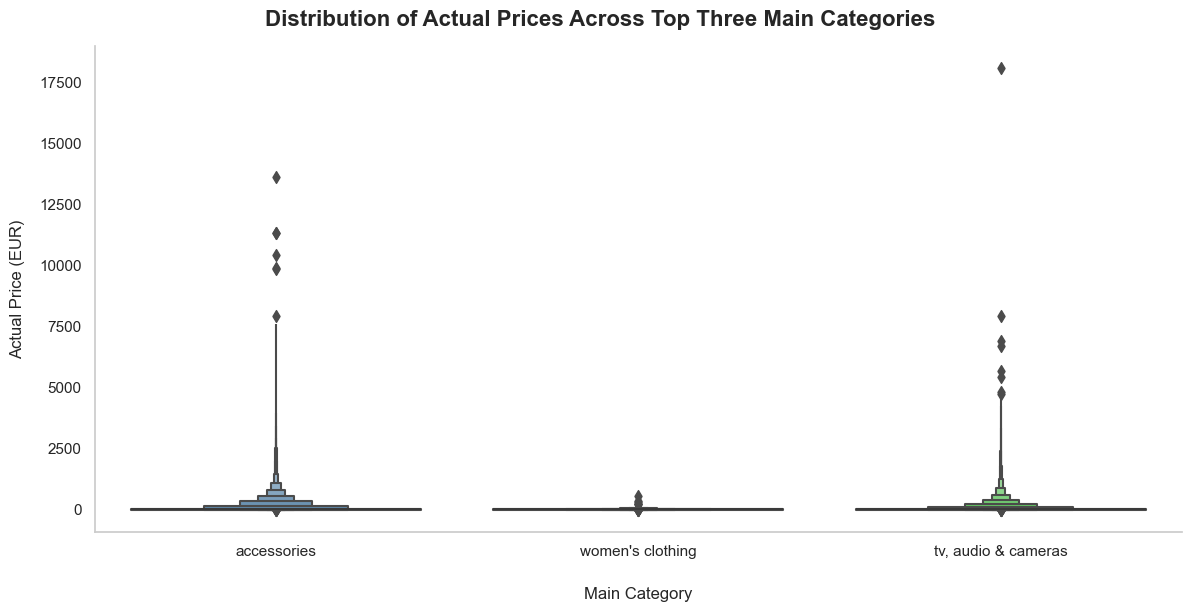

In [95]:
# Find the top three main categories with the most products
top_main_categories = combined_df['main_category'].value_counts().head(3).index.tolist()

# Create side-by-side Boxen plots
g = sns.catplot(
    x='main_category', 
    y='actual_price_eur', 
    kind='boxen', 
    data=combined_df[combined_df['main_category'].isin(top_main_categories)], 
    palette=['steelblue', 'salmon', 'limegreen'], 
    order=top_main_categories,
    height=6, 
    aspect=2
)

# Customize the plot with updated axis labels
g.set_axis_labels("Main Category", "Actual Price (EUR)")

# Manually adjust the ylabel
for ax in g.axes.flat:
    ax.set_ylabel('Actual Price (EUR)', labelpad=10)
    ax.set_xlabel("Main Category", labelpad=20)

# Set the overall title for the figure
g.fig.suptitle('Distribution of Actual Prices Across Top Three Main Categories', fontsize=16, fontweight='bold', va='top')

# Adjust subplot parameters for better layout
plt.subplots_adjust(top=0.92)
plt.grid(False)

# Show the plot
plt.show()


#### **b) Insights Distribution of Actual Prices**

The violin plots illustrate the distribution of actual prices for three main categories: accessories, women's clothing, and TV, audio & cameras.

Here's an interpretation and comparison of each category:

**Accessories:**

- The violin plot indicates that most accessory prices are low, as seen by the thick base. However, there is a long tail extending towards higher prices, suggesting a few items are priced much higher than the majority.
- There are a few outliers indicated by individual points well above the main distribution, with the highest approaching 15,000 EUR.

**Women's Clothing:**

- This category has a very narrow and tall violin shape, implying a very concentrated distribution of prices around a lower median compared to the accessories category.
- There's a minor presence of higher-priced outliers but not as extreme as in the accessories category.

**TV, Audio & Cameras:**

- The shape here is similar to that of women's clothing, suggesting that most products are also clustered at a lower price point.
- Like the accessories category, there are outliers that suggest a few products have significantly higher prices. The highest outliers in this category also approach the 17,500 EUR mark, much like in the accessories category.

**Comparative Insights:**

- The accessories and TV, audio & cameras categories have a similar range of prices, from very low to very high, but accessories exhibit a wider distribution of lower and mid-range prices before reaching the tail of high-priced items.

- Women's clothing seems to have a much tighter price range, with the vast majority of items concentrated at the lower end of the price spectrum.

- All categories show outliers, but accessories have outliers that cover a wider range of high prices.

- This suggests that while women's clothing tends to be more uniformly priced, there is a greater variability in the pricing of accessories and electronic products.

### **Price Density by Subcategories**

#### **a) KDE-Plot: Price Density by Subcategories**

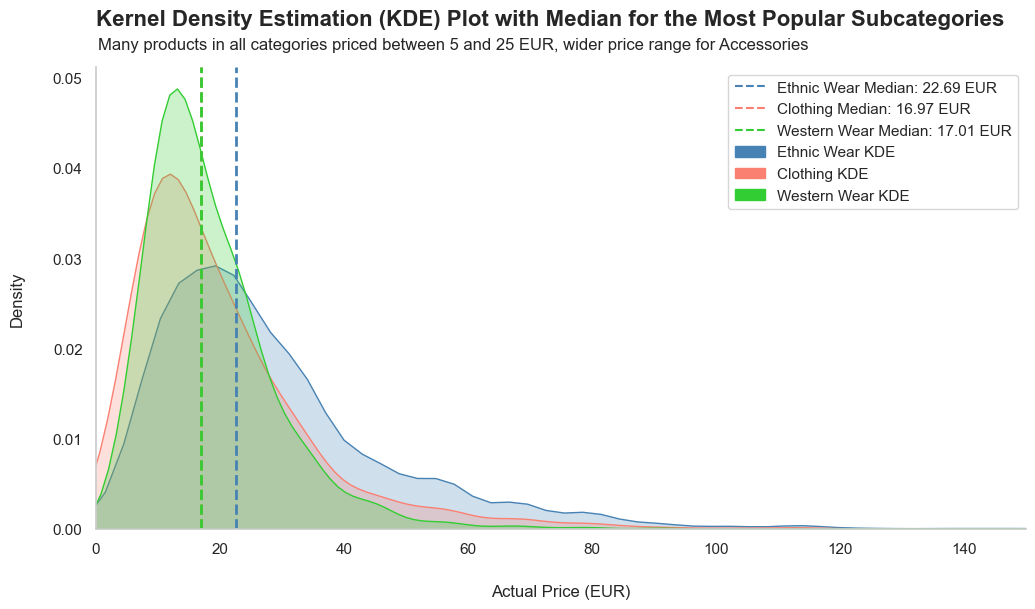

In [81]:
# Find the top three subcategories with the most products
top_sub_categories = combined_df['sub_category'].value_counts().head(3).index

# Filter the DataFrame by the top three subcategories
filtered_df = combined_df[combined_df['sub_category'].isin(top_sub_categories)]

# Define custom settings for bins, titles, and x-axis limits
subcategory_settings = {
    top_sub_categories[0]: {"bins": 100, "x_limit": 200, "color": "steelblue", "color_lines": "steelblue", "bw": 1.5},
    top_sub_categories[1]: {"bins": 5000, "x_limit": 200, "color": "salmon", "color_lines": "salmon", "bw": 2},
    top_sub_categories[2]: {"bins": 500, "x_limit": 200, "color": "limegreen", "color_lines": "limegreen", "bw": 2}
}

# Create a KDE plot for each selected subcategory
plt.figure(figsize=(12, 6))  # Increase the figure size for better visibility

# Set the x-axis limit for all plots
plt.xlim(0, 150)

# Create a custom legend for the average lines
legend_labels = []
legend_handles = []
for category, settings in subcategory_settings.items():
    category_df = filtered_df[filtered_df['sub_category'] == category]
    
    # Calculate the relative frequency (in percentage) and adjust the y-axis scaling
    kde = sns.kdeplot(category_df['actual_price_eur'], color=settings["color"], label=f'{category} KDE', fill=True, bw_adjust=settings["bw"])  # Fill the areas under the lines
    avg_price = category_df['actual_price_eur'].median()
    plt.axvline(x=avg_price, color=settings["color_lines"], linestyle='--', linewidth=2.0, label=f'{category} Median: {avg_price:.2f} EUR')  # Add average lines
    legend_labels.append(f'{category} Median: {avg_price:.2f} EUR')
    legend_handles.append(Line2D([0], [0], color=settings["color_lines"], linestyle='--', label=f'{category} Median: {avg_price:.2f} EUR'))

# Create a custom legend for the KDE plots
kde_legend_labels = []
kde_legend_handles = []
for category, settings in subcategory_settings.items():
    kde_legend_labels.append(f'{category} KDE')
    kde_legend_handles.append(Patch(color=settings["color"], label=f'{category} KDE'))

# Combine both legends
legend_labels += kde_legend_labels
legend_handles += kde_legend_handles

# Add the custom legend
plt.legend(legend_handles, legend_labels, loc="upper right")

# Change the title for the plot
plt.title("Kernel Density Estimation (KDE) Plot with Median for the Most Popular Subcategories", fontsize=16, fontweight='bold', loc='left', pad=30)
plt.suptitle("Many products in all categories priced between 5 and 25 EUR, wider price range for Accessories", fontsize=12, x=0.423, y=0.93)
plt.xlabel("Actual Price (EUR)", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.grid(False)

# Remove the upper and right spines
sns.despine(right=True, top=True)

# Show the plot
plt.show()

####  **b ) Insights: Density of Prices by Subcategories**

The chart above provides Kernel Density Estimations (KDE) for the prices of the top three clothing categories: Ethnic Wear, Clothing, and Western Wear. 

Here's a comparative interpretation:

**Ethnic Wear (Green line and area):**

- The median price is at 22.69 EUR, which is the highest median value among the three categories.
- The distribution has a high peak at lower prices and extends with a long tail toward higher prices. This indicates a broad range of prices, but a majority of the products are priced on the lower end.

**Clothing (Red line and area):**

- The median price is 16.97 EUR, indicating a more moderate pricing segment.
- The price distribution is quite concentrated with a sharp peak and fewer products in the higher price range compared to Ethnic Wear.

**Western Wear (Blue line and area):**

- The median price is close to that of Clothing, at 17.01 EUR.
- Similar to Clothing, there's a concentration of products in the lower price range, but the distribution seems to be a bit wider, indicating a greater spread of prices.

**Commonalities and Differences:**

- Commonalities: All three categories have a large number of products priced between 5 and 25 EUR. This suggests that there is a strong concentration of products in the lower to middle price range across all categories.

**Differences:**

- Median Prices: Ethnic Wear has the highest median price, followed by Western Wear, and then Clothing, suggesting that Ethnic Wear is generally more expensive than the other categories.
- Price Spread: Ethnic Wear exhibits the broadest price distribution with a significant share of products in higher price brackets. Clothing and Western Wear, on the other hand, are more tightly clustered around a central price range and drop off more quickly at higher prices.

**Conclusions:**

- Customers looking for mid-range prices might be more inclined towards Clothing and Western Wear, while those willing to spend more may show greater interest in Ethnic Wear.
- The higher median in Ethnic Wear might suggest that this category is considered more premium or specialized due to unique designs or materials.
- This analysis provides useful insights for businesses or retailers to adjust their pricing strategies for different clothing categories and to understand where the bulk of their products are positioned price-wise in comparison to the competition.



### **Price Distribution by Brands**

#### **a) Violinplot Distribution by Brands**

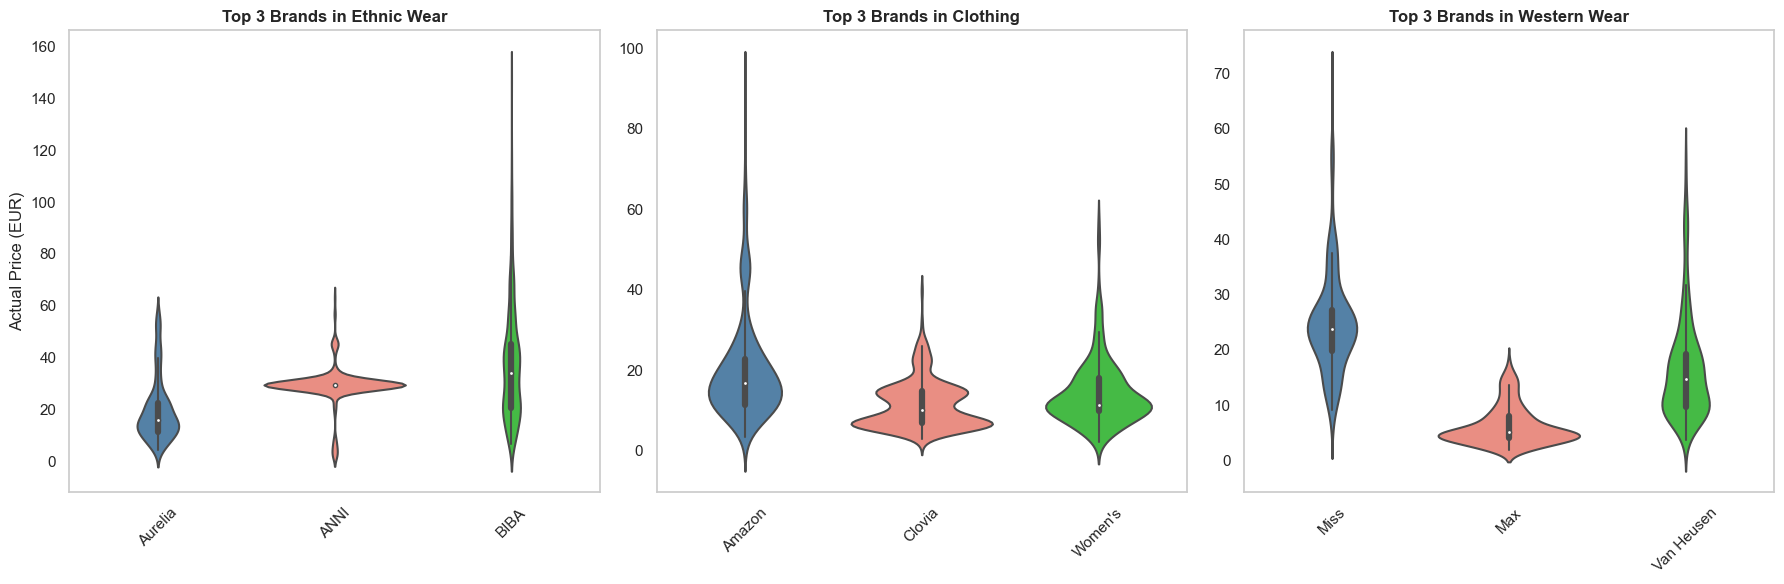

In [97]:
# Determine the top three subcategories with the most products
top_sub_categories = combined_df['sub_category'].value_counts().head(3).index

# Initialize the figure for plots
plt.figure(figsize=(18, 6))

# Define the color palette for the plots
palette = ['steelblue', 'salmon', 'limegreen']

# Loop through each top subcategory
for index, sub_category in enumerate(top_sub_categories, start=1):
    # Filter the DataFrame for the current subcategory
    sub_category_df = combined_df[combined_df['sub_category'] == sub_category]
    
    # Find the top three brands within this subcategory
    top_brands_in_sub_category = sub_category_df['brand'].value_counts().head(3).index.tolist()
    
    # Filter the DataFrame for these top brands
    sub_category_top_brands_df = sub_category_df[sub_category_df['brand'].isin(top_brands_in_sub_category)]
    
    # Create a violin plot for each top subcategory
    plt.subplot(1, 3, index)
    sns.violinplot(
        x='brand', 
        y='actual_price_eur', 
        data=sub_category_top_brands_df, 
        palette=palette[:len(top_brands_in_sub_category)]  # Use the defined color palette
    )
    plt.title(f'Top 3 Brands in {sub_category}', fontweight="bold")
    plt.ylabel('Actual Price (EUR)' if index == 1 else '')  # Only add y-axis label to the first plot for clarity
    plt.xlabel('')
    plt.grid(False)
    plt.xticks(rotation=45)  # Rotate brand names for better visibility

# Adjust layout
plt.tight_layout()

# Display the figure with plots
plt.show()


#### **b) Insights Price Distribution by Brands**

The violin plots shows the actual price distribution of the top three brands within three different clothing categories: Ethnic Wear, Clothing, and Western Wear. Each plot shows the density of different price points, with wider sections representing a higher density of items at that price.

**Ethnic Wear:**

- The brand "Aurelia" has a very narrow distribution, indicating most of its items are clustered around a specific price point, which appears to be around 20 EUR.
- "ANNI" shows a broad price distribution, with a wide range of prices, but most concentrated around 20-40 EUR. There is a notable peak, indicating a common price point around 30 EUR.
- "BIBA" exhibits a narrow peak similar to "Aurelia," with a small number of items at higher price points, extending up to around 160 EUR.

**Clothing:**

- "Amazon" brand shows a concentrated distribution around the 20 EUR mark, with a slight skew towards higher prices but still below 60 EUR.
- "Clovia" has a broad distribution with a wide base, indicating a diverse range of prices with the majority between 0 and approximately 30 EUR.
- "Women's" brand is very narrowly distributed around a central price point, similar to "Aurelia" in Ethnic Wear, with the bulk of items priced just above 20 EUR.

**Western Wear:**

- "Miss" has a narrow distribution, suggesting most of its items are around the 20 EUR price, similar to "Aurelia" and "Women's" in the other categories.
- "Max" shows a broader distribution with items priced from the low end up to just over 60 EUR, with a slight concentration around 20 EUR.
- "Van Heusen" has a relatively concentrated price distribution around 20-30 EUR, similar to "Miss," but with a longer tail of higher-priced items reaching up to around 70 EUR.

**Comparative Insights:**

- "Aurelia," "Women's," and "Miss" all show similar pricing strategies with most items centered around a specific price point, indicating a targeted market segment.
- "ANNI" and "Clovia" show more variability in pricing, suggesting a wider range of products that could appeal to a broader customer base.
- "BIBA" and "Van Heusen" have outliers with much higher prices, which might indicate these brands offer some premium products alongside their standard range.

In all three clothing categories, there appears to be a common price point around 20 EUR where the majority of items are concentrated. This might be a key competitive price range in the fashion retail market.

## **Distribution of Ratings**

### **Distribution of Ratings by Main Categories**

#### **a) Violinplot Distribution of Ratings by Main Categories**

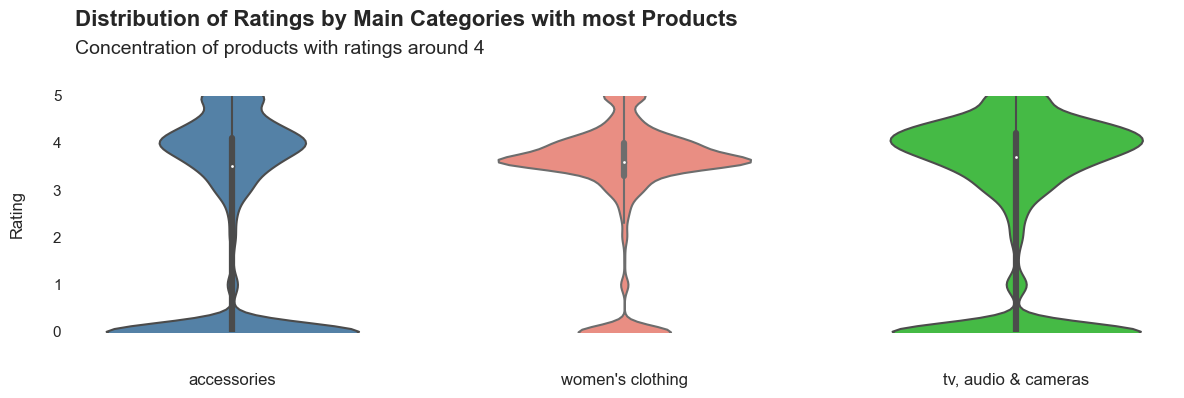

In [27]:
# Determine the top three main categories with the most products
top_main_categories = combined_df['main_category'].value_counts().head(3).index

# Define a list of colors for the plots
colors = ['steelblue', 'salmon', 'limegreen']

# Create a grid of Violin plots for each top main category
plt.figure(figsize=(12, 6))  # Modify the size of the entire plot

for i, (category, color) in enumerate(zip(top_main_categories, colors), 1):
    plt.subplot(1, 3, i)
    category_df = combined_df[combined_df['main_category'] == category]

    sns.violinplot(y=category_df['ratings'], color=color)  # Change to Violin plot and swap x and y

    # Adjust the y-axis range for each plot individually
    plt.ylim(0, 5)  # You can adjust the y-axis limits here

    plt.title("")  # Use the name of the main category as the title
    plt.xlabel(category, labelpad=20)  # Since it's a Violin plot, we use Density instead of Frequency
    plt.ylabel("Rating", labelpad=20)
    plt.grid(False)

    # Use sns.despine to customize the gridlines
    sns.despine(top=True, left=True, right=True, trim=True)  # Keep only the horizontal gridlines

    if i != 1:
        plt.gca().set_yticklabels([])  # Remove y-axis labels and scaling
        plt.ylabel("")

    if i == 1 or i == 3:
        plt.xlabel(category, labelpad=20)
    
    if i == 1:
        plt.title("Distribution of Ratings by Main Categories with most Products", fontsize=16, fontweight="bold", pad=50, loc="left")  # Add subtitle

# Change the title for all plots
plt.suptitle("Concentration of products with ratings around 4", fontsize=14, x=0.24, y=0.76)

# Adjust the spacing between title and plots
plt.tight_layout(rect=[0.0, 0.15, 1, 0.9])  # Modify the rect value for the vertical position of the subtitle

# Show the plots
plt.show()


#### **b) Insights: Ratings by main categories**

The violin plots above show the distribution of ratings across three main product categories: accessories, women's clothing, and TV, audio & cameras and the given ratings scale from 0 to 5.

**Interpretation of Each Category:**

- **Accessories (Blue Violin Plot):**

    - The distribution of ratings for accessories has two peaks, one around the rating of 1 and another smaller peak at 4. This suggests a polarized opinion among customers, with a significant number of items receiving low ratings, but a good number of them are also rated highly.
    - The concentration of ratings at 4 is less compared to the other two categories.

- **Women's Clothing (Red Violin Plot):**

    - The distribution is bimodal with peaks at ratings of 1 and 5, which indicates there are significant amounts of products with both low and high ratings.
    - The peak at the rating of 5 is quite pronounced, suggesting that there is a substantial proportion of women's clothing items that are rated very favorably.

- **TV, Audio & Cameras (Green Violin Plot):**

    - This category has a single, central peak around the rating of 4, indicating that most products in this category have good ratings.
    - The distribution is quite tight around this peak, with fewer products receiving very low or perfect ratings, suggesting a generally consistent customer satisfaction in this category.

**Comparative Insights:**

- Women's clothing has the most pronounced high-rating peak, which could mean customers tend to be very satisfied with their purchases, or it could reflect a potential skew in the data where customers are more likely to leave a review if they are very satisfied.
- TV, audio & cameras exhibit the most consistent satisfaction, with most ratings clustering around 4, and less variability compared to the other categories.
- Accessories have the most variation in ratings, with a substantial number of both low and high ratings, suggesting a less consistent customer experience or a wider quality range among products.

### **Distribution of Ratings by Subcategories**
#### **a) Violinplot Ratings by Subcategories**

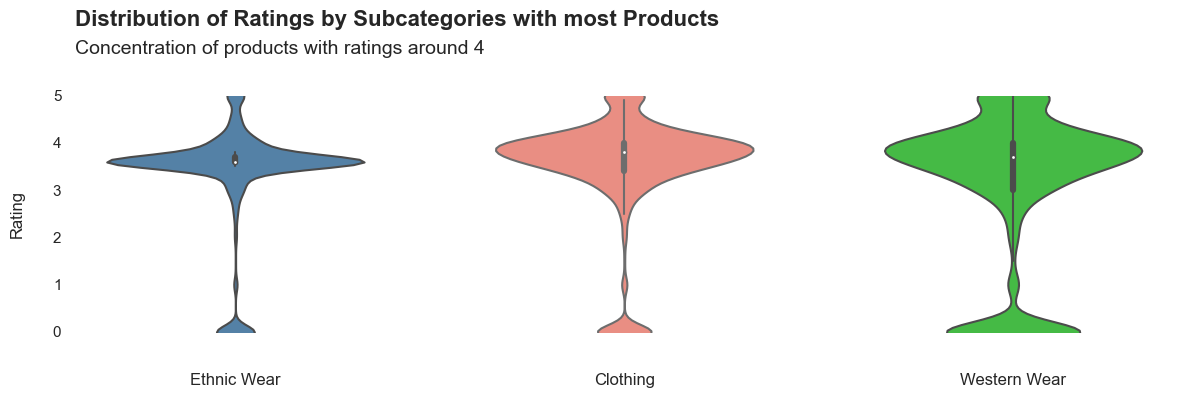

In [101]:
# Determine the top three subcategories with the most products
top_sub_categories = combined_df['sub_category'].value_counts().head(3).index

# Define a list of colors for the plots
colors = ['steelblue', 'salmon', 'limegreen']

# Create a grid of Violin plots for each top subcategory
plt.figure(figsize=(12, 6))

for i, (category, color) in enumerate(zip(top_sub_categories, colors), 1):
    plt.subplot(1, 3, i)
    category_df = combined_df[combined_df['sub_category'] == category]
    
    sns.violinplot(y=category_df['ratings'], color=color)  # Change to Violin plot and swap x and y
    
    # Adjust the y-axis range for each plot individually
    plt.ylim(0, 5)  # You can adjust the y-axis limits here
    
    plt.title("")  # Use the name of the subcategory as the title
    plt.xlabel(category, labelpad=20)  # Since it's a Violin plot, we use Density instead of Frequency
    plt.ylabel("Rating", labelpad=20)
    plt.grid(False)

    # Use sns.despine to customize the gridlines
    sns.despine(top=True, left=True, right=True, trim=True)  # Keep only the horizontal gridlines

    if i != 1:
        plt.gca().set_yticklabels([])  # Remove y-axis labels and scaling
        plt.ylabel("")

    if i == 1 or i == 3:
        plt.xlabel(category, labelpad=20)
    
    if i == 1:
        plt.title("Distribution of Ratings by Subcategories with most Products", fontsize=16, fontweight="bold", pad=50, loc="left")  # Add subtitle

        # Modify the title for all plots
plt.suptitle("Concentration of products with ratings around 4", fontsize=14, x=0.24, y=0.76)

# Adjust the spacing between title and plots
plt.tight_layout(rect=[0.0, 0.15, 1, 0.9])  # Modify the rect value for the vertical position of the subtitle

# Show the plots
plt.show()


#### **b) Insights: Ratings in Subcategories**

This image displays violin plots for the distribution of product ratings in three different subcategories: Ethnic Wear, Clothing, and Western Wear. The ratings scale seems to be from 0 to 5.

**Interpretation of Each Subcategory:**

- **Ethnic Wear (Blue Violin Plot):**

    - The ratings for Ethnic Wear show a wide base, indicating a distribution of ratings across the scale, but with a noticeable concentration around the rating of 4.
    - There's a minor peak near rating 1, showing some level of dissatisfaction among a few customers.

- **Clothing (Red Violin Plot):**

    - The ratings in Clothing are highly concentrated around 4, with very slim parts of the violin plot at the lower and upper ends, indicating few ratings at the extremes.
    - This subcategory appears to have a consistent customer satisfaction with a narrower range of variation in ratings compared to Ethnic Wear.

- **Western Wear (Green Violin Plot):**

    - The distribution of ratings for Western Wear is very tight around the 4 rating mark, with very little spread across the scale. This suggests a strong consistency in high customer satisfaction.
    - The Western Wear plot does not have the lower peak that Ethnic Wear does, indicating fewer low ratings.

**Comparative Insights:**

- **Consistency:** Western Wear appears to have the most consistent high ratings among the three, with ratings densely packed around 4 and less variation. Clothing also shows a strong concentration of high ratings, while Ethnic Wear displays a bit more variability.
- **Satisfaction:** All three subcategories show a concentration of products with ratings around 4, implying generally good customer satisfaction across the board.
- **Potential Issues: The broader base and slight peak at the lower end for Ethnic Wear might point to a subset of products or experiences that are not meeting customer expectations as well as the other two subcategories.

In conclusion, while all three subcategories seem to perform well with customer ratings heavily skewed towards 4, Western Wear stands out with the highest concentration of good ratings, indicating high satisfaction. Clothing follows closely, and Ethnic Wear, while still rated positively, shows more diversity in customer opinion.

###  **Distribution of Ratings by Brands**

#### **a) Violinplot Ratings by Brands**

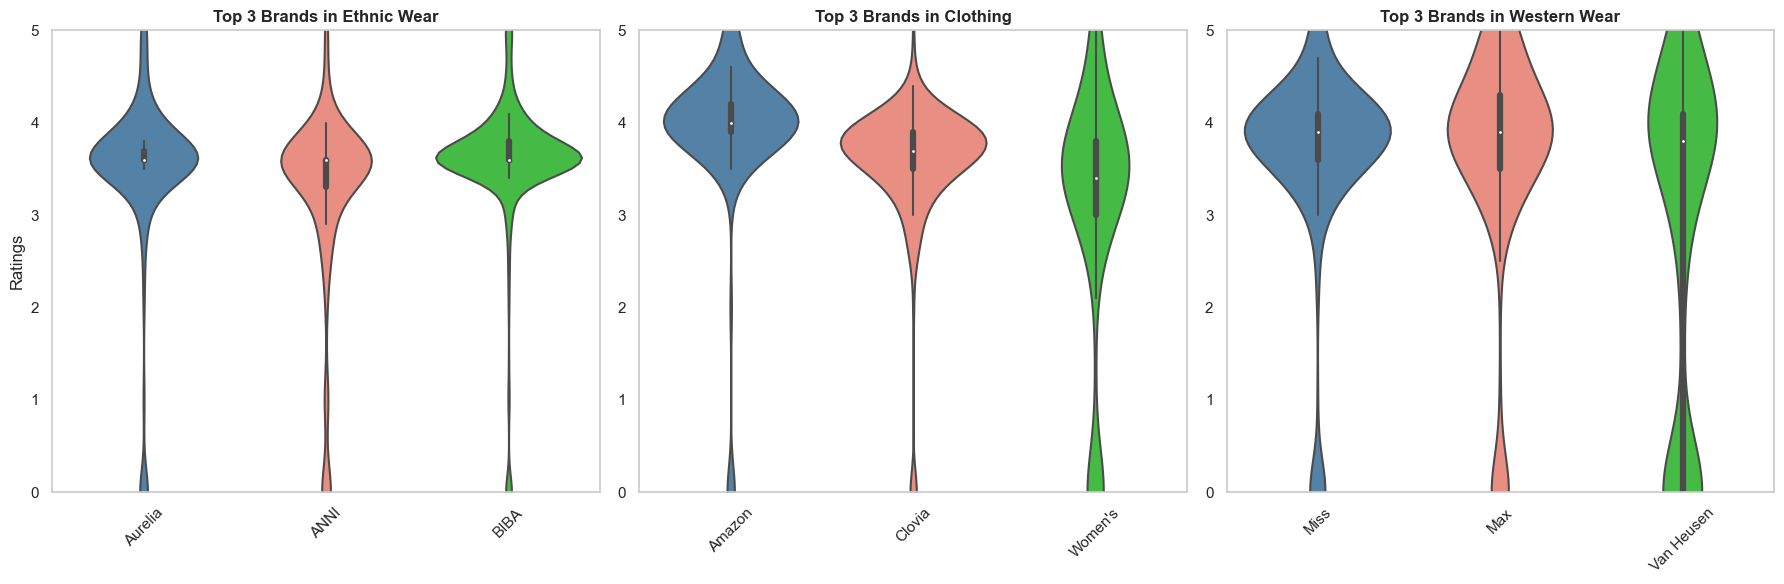

In [99]:
# Step 1: Determine the top three subcategories with the most products
top_sub_categories = combined_df['sub_category'].value_counts().head(3).index

# Initialize the figure for plots
plt.figure(figsize=(18, 6))

# Define your favorite colors for the plots
favorite_colors = ['steelblue', 'salmon', 'limegreen']

# Loop through each top subcategory
for index, sub_category in enumerate(top_sub_categories, start=1):
    # Filter the DataFrame for the current subcategory
    sub_category_df = combined_df[combined_df['sub_category'] == sub_category]
    
    # Step 2: Find the top three brands within this subcategory
    top_brands_in_sub_category = sub_category_df['brand'].value_counts().head(3).index.tolist()
    
    # Filter the DataFrame for these top brands
    sub_category_top_brands_df = sub_category_df[sub_category_df['brand'].isin(top_brands_in_sub_category)]
    
    # Step 3: Create a violin plot for each top subcategory
    plt.subplot(1, 3, index)
    sns.violinplot(
        x='brand', 
        y='ratings', 
        data=sub_category_top_brands_df, 
        palette=favorite_colors  # Apply your favorite colors
    )
    plt.title(f'Top 3 Brands in {sub_category}', fontweight="bold")
    plt.ylim(0, 5)  # Ensure ratings are on a 0-5 scale
    plt.ylabel('Ratings' if index == 1 else '')  # Add y-axis label only to the first plot for clarity
    plt.xlabel('')
    plt.grid(False)
    plt.xticks(rotation=45)  # Rotate brand names for better visibility

# Adjust layout
plt.tight_layout()

# Display the figure with plots
plt.show()


#### **b) Insights: Rating by brands**

The violin plots show ratings distributions across different brands within three clothing subcategories: Ethnic Wear, Clothing, and Western Wear. Each brand’s rating distribution is visually represented by a distinct violin plot.

Let`s comparise them:

**Ethnic Wear:**

- "Aurelia" appears to have a rating distribution mostly between 3 and 4, with a slight skew towards higher ratings, indicating general customer satisfaction.
- "ANNI" shows a broader distribution, with the bulk of ratings between 2 and 4. The widest part of the violin plot is around 3, suggesting this is the most common rating for ANNI.
- "BIBA" has a distribution that is concentrated between 3.5 and 4.5, which suggests higher customer satisfaction compared to the other two brands.

**Clothing:**

- "Amazon" has a violin plot with a wider base extending towards lower ratings, indicating a wider range of opinions but with a concentration around the 3 to 4 rating range.
- "Clovia" shows a distribution with a concentration of ratings around 4, similar to "BIBA" in Ethnic Wear, indicating a generally positive customer reception.
- "Women’s" brand shows ratings primarily between 3 and 4, with a peak at 4, but with a broader price range than the others, suggesting good customer satisfaction.

**Western Wear:**

- "Miss" has a similar distribution to "Clovia" and "BIBA," with a concentration of ratings around 4.
- "Max" displays a broader distribution of ratings from 2 to 4, with the majority around 3.
- "Van Heusen" has ratings mostly between 3 and 4 with a tight concentration around 4, indicating that customers are generally satisfied with the brand.

**Comparative Insights:**

- The "BIBA" and "Van Heusen" brands in Ethnic Wear and Western Wear, respectively, show higher customer satisfaction with a concentration of ratings in the upper range.
- The "Amazon" brand in Clothing and "Max" in Western Wear exhibit broader distributions, suggesting a more varied customer experience.
- The "ANNI" brand in Ethnic Wear has a wider range of ratings compared to "Aurelia" and "BIBA," suggesting more variability in how customers perceive the quality or value of the products.

Overall, the general trend across all subcategories indicates that most products are rated around 4, reflecting good customer satisfaction. However, there is noticeable variation between brands within each subcategory, which could inform targeted improvements or highlight where brands are succeeding in meeting customer expectations.

## **Summary**


During this project we performed a comprehensive analysis of an indian Amazon dataset, exploring the structure, characteristics, and dynamics of the market based on product categories, brands, prices, discounts, and customer ratings. The analysis yielded several key insights into consumer behavior, market segmentation, and opportunities for businesses within the e-commerce space.

### **Objectives and Key Insights**

- **Exploration of Structure and Characteristics of the Dataset:** The initial goal was to understand the dataset's composition, focusing on product categories, brands, and their attributes like prices and reviews.

- **Popularity of Product Categories and Brands:** Categories such as "Accessories" and "Women's Clothing" emerged as highly popular, indicating significant consumer interest. Conversely, "Pet Supplies" and "Music" were identified as more niche markets.

- **Impact of Prices, Discounts, and Reviews on Ratings:** The analysis found very weak correlations between prices/discounts and product ratings, suggesting that other factors might play a more significant role in influencing customer satisfaction.

- **Insights into Prices and Ratings by Categories and Brands:** Detailed examination of prices and ratings revealed variability across categories and brands, with some showing higher price points or better customer ratings, indicating market segmentation and potential premiumization strategies.

- **Strategic Insights for Business:** The analysis provides strategic insights for businesses on market entry, product development, and competitive positioning. For instance, emerging categories like "Beauty & Health" and "Sports & Fitness" present growth opportunities, while saturated markets like "Accessories" demand differentiation.

### **Market Dynamics and Consumer Behavior**

- **Consumer Focus and Market Saturation:** High product counts in "Accessories" and "Women's Clothing" suggest consumer demand but also indicate competitive markets where differentiation is key.
- **Technology and Lifestyle:** The prominence of "TV, Audio & Cameras" and "Home & Kitchen" categories highlights consumer interest in technology and lifestyle products.
- **Niche vs. Mass Markets:** Categories with fewer products, such as "Pet Supplies," may offer opportunities in niche markets with dedicated customer bases.
- **Product Lifecycle and Market Opportunities:** Analysis of product lifecycle stages revealed insights into categories experiencing growth, maturity, or decline, guiding businesses on where to invest or innovate.

### **Brand and Price Analysis**

- **Brands by Number of Products:** Brands like PC Jeweller and Puma were noted for their extensive product ranges, indicating market breadth and potential consumer appeal.
- **Price Distribution Insights:** The analysis of price distributions within categories and brands revealed variability in pricing strategies, with certain brands showing a broader range of prices, potentially catering to diverse consumer segments.

### **Ratings and Consumer Satisfaction**

- **Ratings by Main Categories and Subcategories:** The distribution of ratings across categories and subcategories showed general consumer satisfaction but also highlighted areas with more variability in customer experiences.
- **Brand Ratings:** Differences in ratings among brands within the same categories underscored the impact of brand reputation and product quality on consumer satisfaction.

### **Conclusion**

The project's findings offer a rich tapestry of insights into the e-commerce market, highlighting areas of consumer interest, market competitiveness, and opportunities for strategic positioning. For businesses, understanding these dynamics can inform product development, marketing, and customer engagement strategies, ultimately enhancing their competitive edge in the online retail landscape.